In [47]:
!pip install pandas
!pip install scikit-learn

In [48]:
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

2.0.2
1.23.5


### Reading the dataset

In [49]:
# check xgboost version
data_path = "..\Data\Final_Data_With_TVD.csv"
df = pd.read_csv(data_path)
print("\nLoaded Data :", data_path, "\n----------------------------------------------")
print("\n","\n",df.head())


Loaded Data : ..\Data\Final_Data_With_TVD.csv 
----------------------------------------------

 
     WELL  mTVDSS  Northing    Easting  \
0  107.0  2550.4  839440.1  2516323.0   
1  107.0  2550.5  839440.1  2516323.0   
2  107.0  2550.7  839440.2  2516323.0   
3  107.0  2550.8  839440.2  2516323.0   
4  107.0  2551.0  839440.2  2516323.0   

   ANGLE_FAIL.DEG                  :  Fail Angle  \
0                                         34.140   
1                                         33.889   
2                                         33.504   
3                                         33.074   
4                                         32.755   

   BRIT_IND.                     :  Brittleness Index  \
0                                             38.377    
1                                             38.336    
2                                             38.968    
3                                             39.797    
4                                             40.163    

### Normalization 

In [50]:
df_max_scaled = df.copy()
i = 0  
# apply normalization techniques
for column in df_max_scaled.iloc[:,1:-1].columns:
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
## view normalized data
display(df_max_scaled)

,WELL,mTVDSS,Northing,Easting,ANGLE_FAIL.DEG : Fail Angle,BRIT_IND. : Brittleness Index,BRIT_PR. : Brittleness Index from Poisson's Ratio,BRIT_YM. : Brittleness Index from Young's Modulus,CS .M/MIN : Compressive Strength,DTCO .US/F : Compressional slowness,...,SHMIN_GRAD. : Horizontal Stress Gradient (Min),STRESS_CUM.PSI : Cumulative stress (SHPZ),UCS_BF.PSI : Uniaxial Compressive Strength (BF),UCS_LAL.PSI : Uniaxial Compressive Strength (lal),VP .FT/S : Compressional velocity,VPVS . : Vp / Vs ratio,VS .FT/S : Shear velocity,YM . : Youngs' Modulus,YM_STAT. : Youngs' Modulus (Static),PRESS_PP.PSI : Pore Pressure
0,107.0,0.725009,0.999859,0.999301,0.034166,0.288380,0.335766,0.191420,0.610207,0.085730,...,0.001686,0.588645,0.191434,0.441660,0.523868,0.669004,0.515452,0.246798,0.156573,4970.330
1,107.0,0.725037,0.999859,0.999301,0.033914,0.288072,0.341791,0.187339,0.604484,0.086639,...,0.001682,0.574730,0.188694,0.435218,0.518374,0.666790,0.511768,0.243030,0.153697,4970.452
2,107.0,0.725094,0.999859,0.999301,0.033529,0.292821,0.359095,0.183354,0.595729,0.088053,...,0.001671,0.563826,0.186028,0.425456,0.510050,0.660517,0.508325,0.239263,0.150898,4970.574
3,107.0,0.725122,0.999859,0.999301,0.033099,0.299050,0.381405,0.178351,0.586081,0.089645,...,0.001658,0.554223,0.182703,0.414832,0.500990,0.652768,0.505164,0.234605,0.147477,4970.696
4,107.0,0.725179,0.999859,0.999301,0.032780,0.301800,0.395424,0.173626,0.578972,0.090842,...,0.001649,0.545325,0.179579,0.407091,0.494389,0.647970,0.502050,0.230221,0.144212,4970.817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41880,97.0,0.996448,0.997326,0.999776,0.041821,0.521198,0.397045,0.473213,0.804345,0.061064,...,0.001493,0.780377,0.413271,0.689807,0.735478,0.647601,0.747477,0.509281,0.387934,5359.269
41881,97.0,0.996492,0.997326,0.999776,0.041938,0.518493,0.387396,0.475360,0.807657,0.060730,...,0.001500,0.784524,0.415210,0.694548,0.739521,0.650923,0.747961,0.511336,0.389956,5359.277
41882,97.0,0.996535,0.997326,0.999776,0.042285,0.524519,0.377663,0.489525,0.817517,0.059751,...,0.001508,0.788764,0.428076,0.708768,0.751648,0.653875,0.756454,0.524488,0.403405,5359.286
41883,97.0,0.996578,0.997326,0.999776,0.042789,0.523084,0.350328,0.504133,0.832080,0.058342,...,0.001530,0.800776,0.441521,0.730052,0.769798,0.663469,0.763567,0.538119,0.417399,5359.294


In [51]:
X, y = df_max_scaled.iloc[lambda x: x.index % 50 == 0, 1:-1], df_max_scaled.iloc[lambda x: x.index % 50 == 0, -1]
print("\n", X.head(), "\n", y.head())


        mTVDSS  Northing   Easting  \
0    0.725009  0.999859  0.999301   
50   0.727112  0.999861  0.999301   
100  0.729216  0.999863  0.999301   
150  0.731376  0.999863  0.999300   
200  0.733508  0.999865  0.999300   

     ANGLE_FAIL.DEG                  :  Fail Angle  \
0                                         0.034166   
50                                        0.032547   
100                                       0.031759   
150                                       0.031515   
200                                       0.030005   

     BRIT_IND.                     :  Brittleness Index  \
0                                             0.288380    
50                                            0.276304    
100                                           0.228107    
150                                           0.272810    
200                                           0.311810    

     BRIT_PR.                     :  Brittleness Index from Poisson's Ratio  \
0               

In [52]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
print("\n", train_X.head(), "\n", test_X.head(), "\n\n\n", train_y.head(), "\n", test_y.head())


          mTVDSS  Northing   Easting  \
17650  0.955156  0.999555  0.999489   
40500  0.936663  0.997325  0.999776   
33150  0.867767  0.997719  0.999833   
33000  0.861269  0.997719  0.999833   
26450  0.842377  0.997931  1.000000   

       ANGLE_FAIL.DEG                  :  Fail Angle  \
17650                                       0.045597   
40500                                       0.044896   
33150                                       0.041091   
33000                                       0.039988   
26450                                       0.042744   

       BRIT_IND.                     :  Brittleness Index  \
17650                                           0.707743    
40500                                           0.664475    
33150                                           0.463225    
33000                                           0.525910    
26450                                           0.566540    

       BRIT_PR.                     :  Brittleness Index fr

### Fitting SVR to the Dataset

In [53]:
from sklearn.svm import SVR
param = {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
regressor = SVR(C=1000, gamma=1, kernel ='rbf')
regressor.fit(train_X,train_y)

SVR(C=1000, gamma=1)

### Predicting a new result

In [54]:
y_pred = regressor.predict(test_X)
rmse = np.sqrt(MSE(test_y, y_pred))
print("RMSE : % f" %(rmse))
r2_score(test_y,y_pred)


RMSE :  2.921324


0.9994214023071785

### Checking Overfitting

In [55]:
y_pred_train = regressor.predict(train_X)
rmse_train = np.sqrt(MSE(train_y, y_pred_train))
print("RMSE: %f" %(rmse))
r2_score(train_y, y_pred_train)

RMSE: 2.921324


0.999581685364652

In [56]:
df_107 = df_max_scaled.iloc[:6000]
# X_TVD_107 = df[:6000:100]['mTVDSS']
X_107, y_107 = df_107.iloc[lambda x: x.index % 149 == 0, 1:-1], df_107.iloc[lambda x: x.index % 149 == 0, -1]
# X_TVD_107

### Visualizing the SVR results

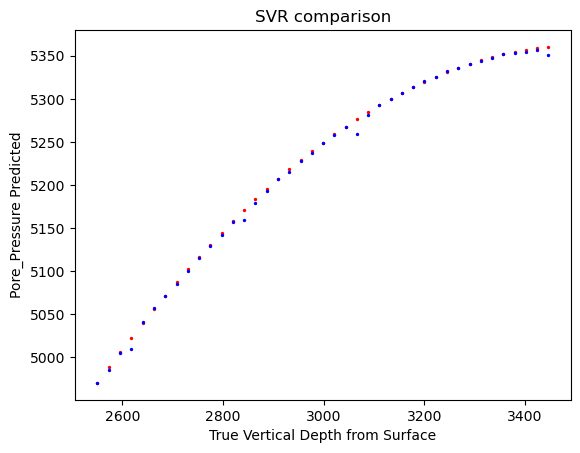

In [57]:
plt.scatter(X_107['mTVDSS']*df['mTVDSS'].abs().max(),y_107, color = 'red', s = 2)
plt.scatter(X_107['mTVDSS']*df['mTVDSS'].abs().max(), regressor.predict(X_107), color = 'blue', s=2)
plt.title('SVR comparison')
plt.xlabel('True Vertical Depth from Surface')
plt.ylabel('Pore_Pressure Predicted')
plt.show()

In [58]:
param_grid = {
    'C': [0.1,1,10,100,1000],
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'kernel': ['rbf','linear']    
}

svr = SVR(kernel ='rbf')

grid = GridSearchCV(svr, param_grid, refit = True, cv=5, scoring='neg_mean_squared_error', verbose = 3)

#fitting the model for grid search
grid.fit(train_X,train_y)
print("best parameters are:", grid.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ...C=0.1, gamma=1, kernel=rbf;, score=-16263.099 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=rbf;, score=-13930.308 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=1, kernel=rbf;, score=-13349.496 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=1, kernel=rbf;, score=-12696.425 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=1, kernel=rbf;, score=-16263.552 total time=   0.0s
[CV 1/5] END C=0.1, gamma=1, kernel=linear;, score=-16041.949 total time=   0.0s
[CV 2/5] END C=0.1, gamma=1, kernel=linear;, score=-13763.369 total time=   0.0s
[CV 3/5] END C=0.1, gamma=1, kernel=linear;, score=-13236.668 total time=   0.0s
[CV 4/5] END C=0.1, gamma=1, kernel=linear;, score=-12623.349 total time=   0.0s
[CV 5/5] END C=0.1, gamma=1, kernel=linear;, score=-16123.337 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.1, kernel=rbf;, score=-16698.404 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.1, kernel=rbf;, sc

[CV 1/5] END .....C=10, gamma=1, kernel=rbf;, score=-1968.088 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=rbf;, score=-1922.782 total time=   0.0s
[CV 3/5] END .....C=10, gamma=1, kernel=rbf;, score=-2211.944 total time=   0.0s
[CV 4/5] END .....C=10, gamma=1, kernel=rbf;, score=-1751.450 total time=   0.0s
[CV 5/5] END .....C=10, gamma=1, kernel=rbf;, score=-2124.278 total time=   0.0s
[CV 1/5] END ..C=10, gamma=1, kernel=linear;, score=-2581.732 total time=   0.0s
[CV 2/5] END ..C=10, gamma=1, kernel=linear;, score=-2388.760 total time=   0.0s
[CV 3/5] END ..C=10, gamma=1, kernel=linear;, score=-2177.352 total time=   0.0s
[CV 4/5] END ..C=10, gamma=1, kernel=linear;, score=-1969.013 total time=   0.0s
[CV 5/5] END ..C=10, gamma=1, kernel=linear;, score=-2404.973 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.1, kernel=rbf;, score=-8968.923 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.1, kernel=rbf;, score=-7821.801 total time=   0.0s
[CV 3/5] END ...C=10, gamma=

[CV 2/5] END .....C=1000, gamma=1, kernel=rbf;, score=-15.473 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=1, kernel=rbf;, score=-25.591 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=1, kernel=rbf;, score=-21.688 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=1, kernel=rbf;, score=-12.666 total time=   0.1s
[CV 1/5] END .C=1000, gamma=1, kernel=linear;, score=-616.015 total time=   0.0s
[CV 2/5] END .C=1000, gamma=1, kernel=linear;, score=-681.430 total time=   0.0s
[CV 3/5] END .C=1000, gamma=1, kernel=linear;, score=-743.269 total time=   0.0s
[CV 4/5] END .C=1000, gamma=1, kernel=linear;, score=-573.716 total time=   0.0s
[CV 5/5] END .C=1000, gamma=1, kernel=linear;, score=-811.697 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=rbf;, score=-442.981 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=rbf;, score=-469.063 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=rbf;, score=-536.718 total time=   0.0s
[CV 4/5] END ..C=1000, gamma

### Feature Importance Calculation

In [59]:
#permutation importance
results = permutation_importance(regressor, train_X, train_y, scoring = 'neg_mean_squared_error')

#get feature importance
importance = results.importances_mean

In [60]:
list_features = ['mTVDSS','Northing', 'Easting','ANGLE_FAIL.DEG                  :  Fail Angle','BRIT_IND.                     :  Brittleness Index','BRIT_PR.                     :  Brittleness Index from Poisson\'s Ratio', 'BRIT_YM.                     :  Brittleness Index from Young\'s Modulus','CS   .M/MIN                 :  Compressive Strength','DTCO .US/F                 :  Compressional slowness','DTSM .US/F                 :  Fast Shear Slowness','IP   .RAYL/M2                 :  P Impedence','IS   .RAYL/M2                 :  S Impedance','KBULK.                     :  Bulk Mudulus','LAMBDA.                     :  Lambda','LAMRHO.                     :  ','MU   .CP                   :  Mu','PR   .                     :  Poisson\'s ratio','PRESS_OB.PSI                  :  Over-burden Pressure','PRESS_SHMAX.PSI                  :  Horizontal Stress (Max)','PRESS_SHMIN.PSI                  :  Horizontal Stress (Min)','PR_STAT.                     :  Poisson\'s ratio (Static)','PZS  .PSI                  :  Processed Zone Stress','SHMAX_GRAD.                     :  Horizontal Stress Gradient (Max)','SHMIN_GRAD.                     :  Horizontal Stress Gradient (Min)','STRESS_CUM.PSI                  :  Cumulative stress (SHPZ)','UCS_BF.PSI                  :  Uniaxial Compressive Strength (BF)','UCS_LAL.PSI                  :  Uniaxial Compressive Strength (lal)','VP   .FT/S                 :  Compressional velocity','VPVS .                     :  Vp / Vs ratio','VS   .FT/S                 :  Shear velocity','YM   .                     :  Youngs\' Modulus','YM_STAT.                     :  Youngs\' Modulus (Static)']
#summarize feature importance 
j=0
for i,v in enumerate(importance):
    print(list_features[j],'Feature: %0d, Score: %.5f' %(i,v))
    j+=1



mTVDSS Feature: 0, Score: 140.97130
Northing Feature: 1, Score: 0.05437
Easting Feature: 2, Score: 0.00296
ANGLE_FAIL.DEG                  :  Fail Angle Feature: 3, Score: 0.00136
BRIT_IND.                     :  Brittleness Index Feature: 4, Score: 182.31786
BRIT_PR.                     :  Brittleness Index from Poisson's Ratio Feature: 5, Score: 225.95224
BRIT_YM.                     :  Brittleness Index from Young's Modulus Feature: 6, Score: 146.39300
CS   .M/MIN                 :  Compressive Strength Feature: 7, Score: 24.59544
DTCO .US/F                 :  Compressional slowness Feature: 8, Score: 0.01896
DTSM .US/F                 :  Fast Shear Slowness Feature: 9, Score: 37.24179
IP   .RAYL/M2                 :  P Impedence Feature: 10, Score: 48.67163
IS   .RAYL/M2                 :  S Impedance Feature: 11, Score: 62.76138
KBULK.                     :  Bulk Mudulus Feature: 12, Score: 0.02328
LAMBDA.                     :  Lambda Feature: 13, Score: 0.02328
LAMRHO.          

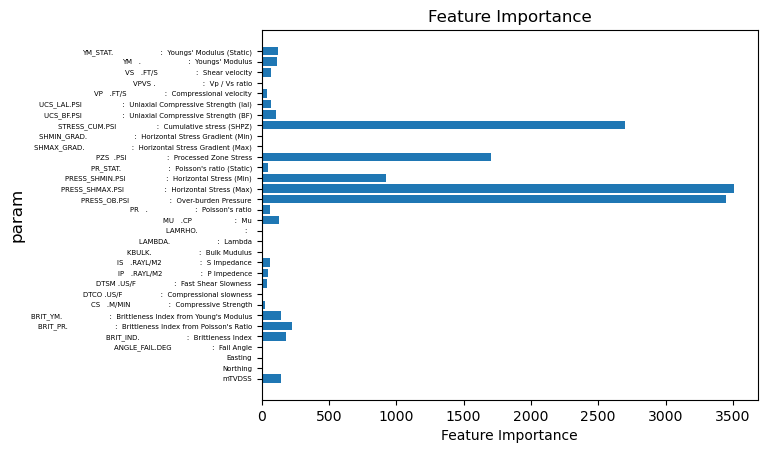

In [61]:
plt.barh(list_features, importance)

# setting label of y-axis 
# setting label of x-axis
plt.xlabel("Feature Importance")
plt.ylabel('param', fontsize = 12)
plt.yticks(fontsize = 5)
plt.title("Feature Importance")
plt.show()

In [62]:
drop_col = []
thres = 100
for i,v in enumerate(importance):
    if(abs(v) < thres):
        drop_col.append(list_features[i])
        print(list_features[i])

Northing
Easting
ANGLE_FAIL.DEG                  :  Fail Angle
CS   .M/MIN                 :  Compressive Strength
DTCO .US/F                 :  Compressional slowness
DTSM .US/F                 :  Fast Shear Slowness
IP   .RAYL/M2                 :  P Impedence
IS   .RAYL/M2                 :  S Impedance
KBULK.                     :  Bulk Mudulus
LAMBDA.                     :  Lambda
LAMRHO.                     :  
PR   .                     :  Poisson's ratio
PR_STAT.                     :  Poisson's ratio (Static)
SHMAX_GRAD.                     :  Horizontal Stress Gradient (Max)
SHMIN_GRAD.                     :  Horizontal Stress Gradient (Min)
UCS_LAL.PSI                  :  Uniaxial Compressive Strength (lal)
VP   .FT/S                 :  Compressional velocity
VPVS .                     :  Vp / Vs ratio
VS   .FT/S                 :  Shear velocity


In [63]:
df_drop_col_scaled = df_max_scaled.drop(drop_col[2:],axis = 1)

In [64]:
X, y = df_drop_col_scaled.iloc[lambda x: x.index % 10 == 0, 1:-1], df_drop_col_scaled.iloc[lambda x: x.index % 10 == 0, -1]
# print("\n", X.head(), "\n", y.head())
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
print("\n", train_X.head(), "\n", test_X.head(), "\n\n\n", train_y.head(), "\n", test_y.head())



          mTVDSS  Northing   Easting  \
38930  0.868646  0.997325  0.999776   
2700   0.840480  0.999918  0.999285   
1040   0.769554  0.999879  0.999295   
18590  0.753711  0.998010  0.999692   
8300   0.837694  0.999595  0.999276   

       BRIT_IND.                     :  Brittleness Index  \
38930                                           0.454305    
2700                                            0.720359    
1040                                            0.604322    
18590                                           0.062670    
8300                                            0.499286    

       BRIT_PR.                     :  Brittleness Index from Poisson's Ratio  \
38930                                           0.447530                        
2700                                            0.308008                        
1040                                            0.311589                        
18590                                           0.077564                

### SVR Dropping columns

In [65]:
param = {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
regressor = SVR(C=1000, gamma=1, kernel ='rbf')
regressor.fit(train_X,train_y)

SVR(C=1000, gamma=1)

In [66]:
y_pred = regressor.predict(test_X)
rmse = np.sqrt(MSE(test_y, y_pred))
print("RMSE : % f" %(rmse))
r2_score(test_y,y_pred)

RMSE :  1.205176


0.9998976947027614

### Visualizing for a well

In [67]:
df_107 = df_drop_col_scaled.iloc[:6000]
# X_TVD_107 = df[:6000:100]['mTVDSS']
X_107, y_107 = df_107.iloc[lambda x: x.index % 149 == 0, 1:-1], df_107.iloc[lambda x: x.index % 149 == 0, -1]
# X_TVD_107

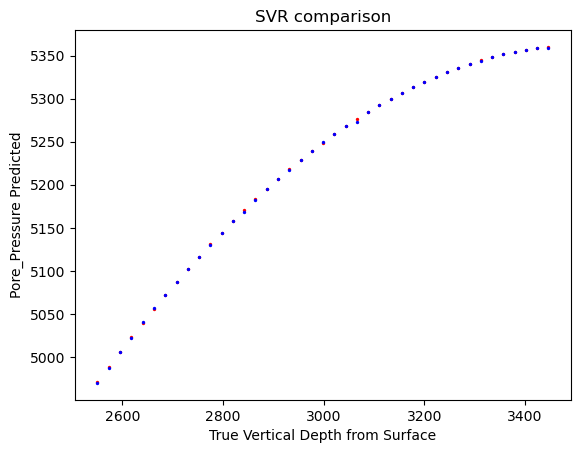

In [68]:
plt.scatter(X_107['mTVDSS']*df['mTVDSS'].abs().max(),y_107, color = 'red', s = 2)
plt.scatter(X_107['mTVDSS']*df['mTVDSS'].abs().max(), regressor.predict(X_107), color = 'blue', s=2)
plt.title('SVR comparison')
plt.xlabel('True Vertical Depth from Surface')
plt.ylabel('Pore_Pressure Predicted')
plt.show()

In [69]:
#permutation importance
results = permutation_importance(regressor, train_X, train_y, scoring = 'neg_mean_squared_error')

#get feature importance
importance = results.importances_mean

In [70]:
##Dropped cols

##ANGLE_FAIL.DEG                  :  Fail Angle
##BRIT_PR.                     :  Brittleness Index from Poisson's Ratio
##CS   .M/MIN                 :  Compressive Strength
##DTCO .US/F                 :  Compressional slowness
##DTSM .US/F                 :  Fast Shear Slowness
##IP   .RAYL/M2                 :  P Impedence
##IS   .RAYL/M2                 :  S Impedance
##KBULK.                     :  Bulk Mudulus
##LAMBDA.                     :  Lambda
##LAMRHO.                     :  
##PR   .                     :  Poisson's ratio
##PR_STAT.                     :  Poisson's ratio (Static)
##SHMAX_GRAD.                     :  Horizontal Stress Gradient (Max)
##SHMIN_GRAD.                     :  Horizontal Stress Gradient (Min)
##UCS_LAL.PSI                  :  Uniaxial Compressive Strength (lal)
##VP   .FT/S                 :  Compressional velocity
##VPVS .                     :  Vp / Vs ratio
##VS   .FT/S                 :  Shear velocity

list_features = ['mTVDSS','Northing', 'Easting','BRIT_IND.                     :  Brittleness Index', 'BRIT_YM.                     :  Brittleness Index from Young\'s Modulus','MU   .CP                   :  Mu','PRESS_OB.PSI                  :  Over-burden Pressure','PRESS_SHMAX.PSI                  :  Horizontal Stress (Max)','PRESS_SHMIN.PSI                  :  Horizontal Stress (Min)','PZS  .PSI                  :  Processed Zone Stress','STRESS_CUM.PSI                  :  Cumulative stress (SHPZ)','UCS_BF.PSI                  :  Uniaxial Compressive Strength (BF)','YM   .                     :  Youngs\' Modulus','YM_STAT.                     :  Youngs\' Modulus (Static)']
#summarize feature importance 
j=0
for i,v in enumerate(importance):
    print(list_features[j],'Feature: %0d, Score: %.5f' %(i,v))
    j+=1



mTVDSS Feature: 0, Score: 27.97411
Northing Feature: 1, Score: 0.16864
Easting Feature: 2, Score: 0.01006
BRIT_IND.                     :  Brittleness Index Feature: 3, Score: 496.53252
BRIT_YM.                     :  Brittleness Index from Young's Modulus Feature: 4, Score: 1146.79351
MU   .CP                   :  Mu Feature: 5, Score: 259.20172
PRESS_OB.PSI                  :  Over-burden Pressure Feature: 6, Score: 236.50110
PRESS_SHMAX.PSI                  :  Horizontal Stress (Max) Feature: 7, Score: 3543.87420
PRESS_SHMIN.PSI                  :  Horizontal Stress (Min) Feature: 8, Score: 3565.75528
PZS  .PSI                  :  Processed Zone Stress Feature: 9, Score: 1383.65182
STRESS_CUM.PSI                  :  Cumulative stress (SHPZ) Feature: 10, Score: 2349.05418
UCS_BF.PSI                  :  Uniaxial Compressive Strength (BF) Feature: 11, Score: 3473.64301
YM   .                     :  Youngs' Modulus Feature: 12, Score: 177.93534
YM_STAT.                     :  Youngs' Mo

IndexError: list index out of range

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (15,) and arg 3 with shape (14,).

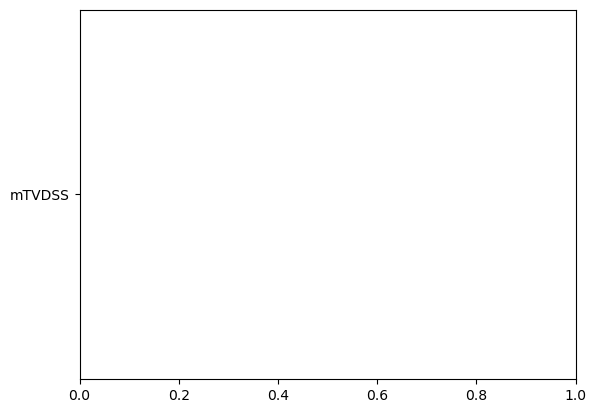

In [71]:
plt.barh(list_features, importance)

# setting label of y-axis 
# setting label of x-axis
plt.xlabel("Feature Importance")
plt.ylabel('param', fontsize = 12)
plt.yticks(fontsize = 5)
plt.title("Feature Importance")
plt.show()

### Important params

In [72]:
imp_col = []
thres = 1000
for i,v in enumerate(importance):
    if(abs(v) > thres):
        imp_col.append(list_features[i])
        print(list_features[i])

BRIT_YM.                     :  Brittleness Index from Young's Modulus
PRESS_SHMAX.PSI                  :  Horizontal Stress (Max)
PRESS_SHMIN.PSI                  :  Horizontal Stress (Min)
PZS  .PSI                  :  Processed Zone Stress
STRESS_CUM.PSI                  :  Cumulative stress (SHPZ)
UCS_BF.PSI                  :  Uniaxial Compressive Strength (BF)
